# Naive Bayes

## Imports

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

## Dataset

In [ ]:
# A small dataset
outlook=['sunny', 'overcast', 'rain']
temperature=['hot', 'mild', 'cold']
humidity=['high', 'normal']
wind=['yes', 'no']
play=['yes', 'no']

columns=["outlook", "temp", "humidity", "windy", "play"]
train_dataset=[
    ["sunny", "hot", "high", "no", "no"],
    ["sunny", "hot", "high", "yes", "no"],
    ["overcast", "hot", "high", "no", "yes"],
    ["rainy", "mild", "high", "no", "yes"],
    ["rainy", "cool", "normal", "no", "yes"],
    ["rainy", "cool", "normal", "yes", "no"],
    ["overcast", "cool", "normal", "yes", "yes"],
    ["sunny", "mild", "high", "no", "no"],
    ["sunny", "cool", "normal", "no", "yes"],
    ["rainy", "mild", "normal", "no", "yes"],
    ["sunny", "mild", "normal", "yes", "yes"],
    ["overcast", "mild", "high", "yes", "yes"],
    ["overcast", "hot", "normal", "no", "yes"],
    ["rainy", "mild", "high", "yes", "no"]]

df_train = pd.DataFrame(train_dataset, columns=columns)
y_train = df_train.pop("play")
X_train = df_train
X_train.head(20)

,outlook,temp,humidity,windy
0,sunny,hot,high,no
1,sunny,hot,high,yes
2,overcast,hot,high,no
3,rainy,mild,high,no
4,rainy,cool,normal,no
5,rainy,cool,normal,yes
6,overcast,cool,normal,yes
7,sunny,mild,high,no
8,sunny,cool,normal,no
9,rainy,mild,normal,no


In [ ]:
# New items for prediction
X_test = pd.DataFrame(data=[['sunny', 'cool', 'high', 'yes'],
                            ['overcast', 'hot', 'high', 'no']],
                      columns=columns[:-1])
X_test.head()

,outlook,temp,humidity,windy
0,sunny,cool,high,yes
1,overcast,hot,high,no


## Solution 1: use sklearn

All features are categorical, we need to use Multinomial Naive Bayes.

* Step 1: encode the feature in categories (MultinomialNB doesn't work with string)
* Step 2: fit MultinomialNB
* Step 3: predict with MultinomialNB

In [ ]:
# Step 1
""" Put your code here """
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
oe.fit(X_train)
X_train_enc = oe.transform(X_train)

In [ ]:
# Step 2
""" Put your code here """
clf = MultinomialNB(fit_prior=True, class_prior=None)
clf.fit(X_train_enc, y_train)

MultinomialNB()

In [ ]:
# Step 3
""" Put your code here """
clf.predict(oe.transform(X_test))

array(['no', 'yes'], dtype='<U3')

## Solution 2: build your own Naive Bayes classifier

* The features are assumed to be generated from a simple multinomial distribution.
* The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.
* We aim at modeling the data distribution with a best-fit multinomial distribution.

$$[TO DO - Students]$$
>* Complete the following functions

In [ ]:
def prior_probability(y_train, play_outcome):
    """
    input:
        - y_train
        - play_outcome: outcome of target variable "play" (string taking values in ['yes','no'])
    output:
        - prior probability P(play = play_outcome) 
    """
    
    """ Solution 1
    
    m = 0
    for i in y_train:
        print(i)
        if i==play_outcome:
            m += 1
    return m/len(play)
    """
    """ Solution 2 """
    return np.mean(y_train==play_outcome)

In [ ]:
prior_probability(y_train, 'no')
# prior_probability(y_train, 'yes') --> 0.64
# prior_probability(y_train, 'no') --> 0.36

0.35714285714285715

In [ ]:
def likelihood(X_train, y_train, feature_name, feature_value, play_outcome):
    """
    inputs:
        X_train
        y_train
        feature_name: string with values in df column names
        feature_value: given value of the variable corresponding to feature_name
        play_outcome: outcome of target variable "play"  (string taking values in ['yes','no'])
    output:
        Compute the conditional probability P(feature_name = feature_value|play= play_outcome)
    """
    m, n = 0, 0
    for i, j in zip(X_train[feature_name],y_train):
        if j==play_outcome:
            m += 1
            if i==feature_value:
                n+=1
    if m==0:
        return 0
    else:
        return n/m

In [ ]:
likelihood(X_train, y_train, "outlook", "sunny", "no")
# likelihood(X_train, y_train, "outlook", "sunny", "yes") --> 0.22
# likelihood(X_train, y_train, "outlook", "sunny", "yes") --> 0.6

0.6

In [ ]:
def predict_play_outcome(X_train, y_train, data):#outlook,temp,humidity,windy):
    """
    inputs:
        X_train
        y_train
        data a dictionnary with
            outlook: value of outlook for a given observation 
            temp: value of outlook for a given observation 
            humidity: value of outlook for a given observation 
            windy: value of outlook for a given observation 
    Outputs:
        predicted label by multinomial naive bayes for the given observation (outlook,temp,humidity,windy)
    """
    P_yes = prior_probability(y_train, "yes")
    for key, value in data.items():
        P_yes = P_yes * likelihood(X_train, y_train, key, value, "yes")
        
    P_no = prior_probability(y_train, "no")
    for key, value in data.items():
        P_no = P_no * likelihood(X_train, y_train, key, value, "no")
    
    if P_yes>P_no:
        return "yes"
    else:
        return "no"

In [ ]:
pred = []
for i in range(len(X_test)):
    pred += [predict_play_outcome(X_train, y_train, X_test.iloc[i])]
# predict_play_outcome(X_train, y_train, X_test.iloc[0]) --> ['no', 'yes']
pred

['no', 'yes']

## Multinomial Naive Bays: text classification

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.

We will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()

In [ ]:
# Print the different classes
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

* datas are available with train.data or test.data
* labels are available with train.target or test.target

In [ ]:
# Print the 6th sample
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [ ]:
# Print the 6th label
print(train.target[5])

3


In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.

You can use binary, count or tf-idf approach in order to vectorize the data.

Create a 2 steps pipeline with your selected features extractor an a multinomial naive Bayes classifier

In [ ]:
# Create the pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model = Pipeline([("pre", TfidfVectorizer()),
                  ("clf", MultinomialNB()),
                 ])

In [ ]:
# Fit the pipeline
model.fit(train.data, train.target)

Pipeline(steps=[('pre', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Predict
pred = model.predict(test.data)

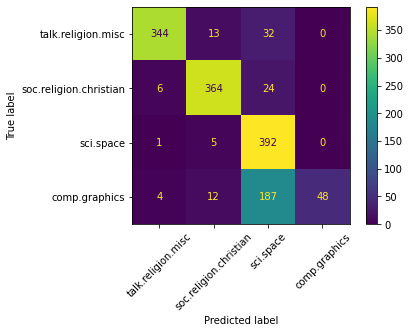

In [ ]:
# Build confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay(confusion_matrix(test.target, pred),
                            display_labels=categories)
cm.plot(xticks_rotation=45)

## Papers and video

* [Naive Bayes, Clearly Explained!!!](https://www.youtube.com/watch?v=O2L2Uv9pdDA)
* [An Introduction to Naive Bayes Algorithm for Beginners](https://www.turing.com/kb/an-introduction-to-naive-bayes-algorithm-for-beginners)